# Unidad 2: Modelos de clasificación

Importar librerias básicas

In [1]:
#Utilidades numéricas
import numpy as np

#Utilidades gráficas
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

#Habilitar gráficas dinámicas
%matplotlib notebook

### 1.- Procesamiento de los datos

X(300, 2)
Y(300, 1)


<IPython.core.display.Javascript object>


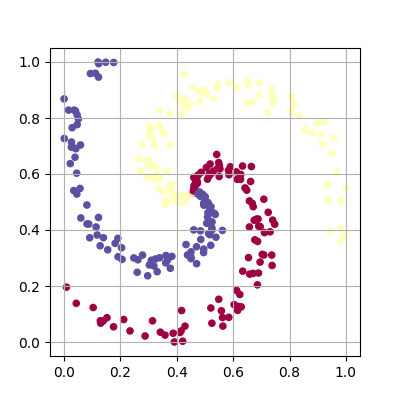

In [2]:
#Cargar datos
data = np.load("datos/clasificacion_p4.npy")

#Extraer informacion
x = data[0:2,:]
y = data[2,:]

#Ordenar informacion
x = x
y = y[:,np.newaxis].astype("uint8")
x = np.transpose(x)

# Normalizar Y
y = (y-np.min(y))
y = y/np.max(y)

# Normalizar X
x[:,0]= (x[:,0]-np.min(x[:,0]))
x[:,0] = x[:,0]/np.max(x[:,0])

x[:,1]= (x[:,1]-np.min(x[:,1]))
x[:,1] = x[:,1]/np.max(x[:,1])

# Desordenar datos
index = np.arange(x.shape[0])
np.random.shuffle(index)

# Desordenar vectores
x = x[index,:]
y = y[index,:]

# Imprimir dimensiones de los datos
print("X" + str(x.shape))
print("Y" + str(y.shape))


#Graficar informacion
plt.figure(figsize=(4,4))
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=20, cmap=plt.cm.Spectral)
plt.grid()
plt.show()

### 2.- Definicion del modelo

In [3]:
#Funciones auxiliares

# Se propone un modelo neuronal
#       Con una capa de entrada de 5 entradas
#       Con una capa oculta de 4 neuronas
#       Con una capa de salida de 3 salidas en SOFTMAX

# Se propone una función de entropía cruzada
#       e = -log(Ym(d)))
#       de/dYm(d) = -1/Ym(d)

# Se propone Gradiete Descendiente
# wo = wo -Lr(de/dw)  --> Se aplican derivadas parciales  

#    CAPA DE SALIDA 
#    de/dw3 = de/dYm(d) * dYm(d)/dh3 * dh3/dw3 = (Ym - Yd) * Ym(1-Ym) * x
#    de/db3 = de/dYm(d) * dYm(d)/dh3 * dh3/db3 = (Ym - Yd) * Ym(1-Ym) * Y2
#    de/dY2 = de/dYm(d) * dYm(d)/dh3 * dh3/dY2 = (Ym - Yd) * Ym(1-Ym) * w3

#    CAPA OCULTA 
#    de/dw2 = de/dY2 * dY2/dh2 * dh2/dw2 = de/dY2 * Y2(1-Y2) * Y1
#    de/db2 = de/dY2 * dY2/dh2 * dh2/db2 = de/dY2 * Y2(1-Y2) * 1
#    de/dY1 = de/dY2 * dY2/dh2 * dh2/dY1 = de/dY2 * Ym(1-Ym) * w2

#    CAPA DE ENTRADA 
#    dYm/dh(d) = Ym(d)[1-Ym(d)]
#    dYm/dh(i) = -Ym(d)Ym(i)
#    de/dw1 = de/dY1 * dY1/dh1 * dh1/dw1 = de/dY1 * Y1(1-Y1) * X
#    de/db1 = de/dY1 * dY1/dh1 * dh1/db1 = de/dY1 * Y1(1-Y1) * 1

In [15]:
#Funciones auxiliares
def sigmoid(x):
    
    y = 1.0/(1.0+np.exp(-x))
    return y

def softmax(x):
    
    y = np.exp(x)/np.sum(np.exp(x))
    return y

def cross_entropy(x):
    
    y = -np.log(x)
    return y

In [ ]:
#Crear clase de modelo de clasificacion
class model:
    
    #Definir constructor
    def __init__(self,ne,no,ns,d):
        
        # Capa de entrada
        self.w1 = np.random.rand(ne,d)-0.5
        self.b1 = np.random.rand(ne,1)-0.5
        
        # Capa oculta
        self.w2 = np.random.rand(no,ne)-0.5
        self.b2 = np.random.rand(no,1)-0.5
        
        # Capa salida
        self.w3 = np.random.rand(ns,no)-0.5
        self.b3 = np.random.rand(ns,1)-0.5
    
    #Procesamiento del modelo
    def forward(self): 
        
        # Capa de entrada
        
        h1 = np.dot(self.w1,x) + self.b1
        y1 = sigmoid(h1)
        
        # Capa oculta
        h2 = np.dot(self.w2,y1) + self.b2
        y2 = sigmoid(h2)
        
        # Capa de salida
        h3 = np.dot(self.w3,y2) + self.b3
        ym = softmax(h3)
        
        return ym
    
    #Entrenamiento del modelo
    def train(self, x, y, Lr, epoch):
        
        pass
    

### 3.- Entrenamiento del modelo

### 4.- Evaluación del modelo

In [ ]:
#Crear gradilla de datos
x_val = np.zeros([2, 400])
y_val = np.zeros(x_val.shape[1], dtype=int)
for i in range(20):
     
    x_val[0, i*20:(i+1)*20] = i/20.0
    x_val[1, i*20:(i+1)*20] = np.linspace(0, 100, 20)/100.0

#Graficar resultados
plt.figure(figsize=(4, 4))
plt.scatter(x_val[0, :], x_val[1, :], c=y_val, s=100, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#Visualizar hiperplanos
fig = plt.figure()
bx = plt.axes(projection = '3d')
bx.scatter(x_val[0, :], x_val[1, :], y_3d[0,:], marker='o', s=10, c='red')
bx.scatter(x_val[0, :], x_val[1, :], y_3d[1,:], marker='o', s=10, c='blue')
bx.scatter(x[0, :], x[1, :], np.zeros(x[0, :].shape) + 0.5, marker='*', s=10, c='black')